In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)

train = pd.read_csv("pfm_train.csv")
test = pd.read_csv("pfm_test.csv")
train.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,37,0,Travel_Rarely,Research & Development,1,4,Life Sciences,77,1,Male,2,2,Manufacturing Director,3,Divorced,5993,1,Y,No,18,3,3,80,1,7,2,4,7,5,0,7
1,54,0,Travel_Frequently,Research & Development,1,4,Life Sciences,1245,4,Female,3,3,Manufacturing Director,3,Divorced,10502,7,Y,No,17,3,1,80,1,33,2,1,5,4,1,4
2,34,1,Travel_Frequently,Research & Development,7,3,Life Sciences,147,1,Male,1,2,Laboratory Technician,3,Single,6074,1,Y,Yes,24,4,4,80,0,9,3,3,9,7,0,6
3,39,0,Travel_Rarely,Research & Development,1,1,Life Sciences,1026,4,Female,2,4,Manufacturing Director,4,Married,12742,1,Y,No,16,3,3,80,1,21,3,3,21,6,11,8
4,28,1,Travel_Frequently,Research & Development,1,3,Medical,1111,1,Male,2,1,Laboratory Technician,2,Divorced,2596,1,Y,No,15,3,1,80,2,1,2,3,1,0,0,0


In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1100 non-null   int64 
 1   Attrition                 1100 non-null   int64 
 2   BusinessTravel            1100 non-null   object
 3   Department                1100 non-null   object
 4   DistanceFromHome          1100 non-null   int64 
 5   Education                 1100 non-null   int64 
 6   EducationField            1100 non-null   object
 7   EmployeeNumber            1100 non-null   int64 
 8   EnvironmentSatisfaction   1100 non-null   int64 
 9   Gender                    1100 non-null   object
 10  JobInvolvement            1100 non-null   int64 
 11  JobLevel                  1100 non-null   int64 
 12  JobRole                   1100 non-null   object
 13  JobSatisfaction           1100 non-null   int64 
 14  MaritalStatus           

In [3]:
train.describe(include='all')

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1100.000000,1100.000000,1100,1100,1100.000000,1100.000000,1100,1100.000000,1100.000000,1100,1100.000000,1100.000000,1100,1100.000000,1100,1100.000000,1100.000000,1100,1100,1100.000000,1100.000000,1100.000000,1100.0,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
unique,NaN,NaN,3,3,NaN,NaN,6,NaN,NaN,2,NaN,NaN,9,NaN,3,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Travel_Rarely,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,Male,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,787,727,NaN,NaN,462,NaN,NaN,653,NaN,NaN,247,NaN,500,NaN,NaN,1100,794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.999091,0.161818,NaN,NaN,9.427273,2.922727,NaN,1028.157273,2.725455,NaN,2.730909,2.054545,NaN,2.732727,NaN,6483.620909,2.683636,NaN,NaN,15.235455,3.152727,2.696364,80.0,0.788182,11.221818,2.807273,2.746364,7.011818,4.207273,2.226364,4.123636
std,9.037230,0.368451,NaN,NaN,8.196694,1.022242,NaN,598.915204,1.098053,NaN,0.706366,1.107805,NaN,1.109731,NaN,4715.293419,2.510017,NaN,NaN,3.628571,0.359888,1.095356,0.0,0.843347,7.825548,1.291514,0.701121,6.223093,3.618115,3.313830,3.597996
min,18.000000,0.000000,NaN,NaN,1.000000,1.000000,NaN,1.000000,1.000000,NaN,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,NaN,NaN,2.000000,2.000000,NaN,504.250000,2.000000,NaN,2.000000,1.000000,NaN,2.000000,NaN,2924.500000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,NaN,NaN,7.000000,3.000000,NaN,1026.500000,3.000000,NaN,3.000000,2.000000,NaN,3.000000,NaN,4857.000000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,NaN,NaN,15.000000,4.000000,NaN,1556.500000,4.000000,NaN,3.000000,3.000000,NaN,4.000000,NaN,8354.500000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [4]:
#Age的最小值是18，因此列Over18可删；StandardHours方差为0，也可删。另外员工工号列也可删除。
train.drop(['Over18','StandardHours','EmployeeNumber'],axis=1,inplace=True)
test.drop(['Over18','StandardHours','EmployeeNumber'],axis=1,inplace=True)
train.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,37,0,Travel_Rarely,Research & Development,1,4,Life Sciences,1,Male,2,2,Manufacturing Director,3,Divorced,5993,1,No,18,3,3,1,7,2,4,7,5,0,7
1,54,0,Travel_Frequently,Research & Development,1,4,Life Sciences,4,Female,3,3,Manufacturing Director,3,Divorced,10502,7,No,17,3,1,1,33,2,1,5,4,1,4
2,34,1,Travel_Frequently,Research & Development,7,3,Life Sciences,1,Male,1,2,Laboratory Technician,3,Single,6074,1,Yes,24,4,4,0,9,3,3,9,7,0,6
3,39,0,Travel_Rarely,Research & Development,1,1,Life Sciences,4,Female,2,4,Manufacturing Director,4,Married,12742,1,No,16,3,3,1,21,3,3,21,6,11,8
4,28,1,Travel_Frequently,Research & Development,1,3,Medical,1,Male,2,1,Laboratory Technician,2,Divorced,2596,1,No,15,3,1,2,1,2,3,1,0,0,0


In [5]:
Attrition_plot=train.Attrition.value_counts()

([<matplotlib.axis.XTick at 0x2b002741f08>,
 <a list of 2 Text xticklabel objects>)

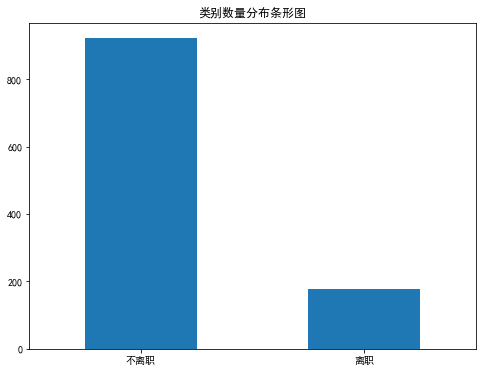

In [6]:
plt.rcParams['font.sans-serif'] = ['SimHei']

plt.figure(figsize=(8, 6))
Attrition_plot.plot(kind='bar', rot=360, title='类别数量分布条形图')
plt.xticks([1, 0], ['离职', '不离职'])

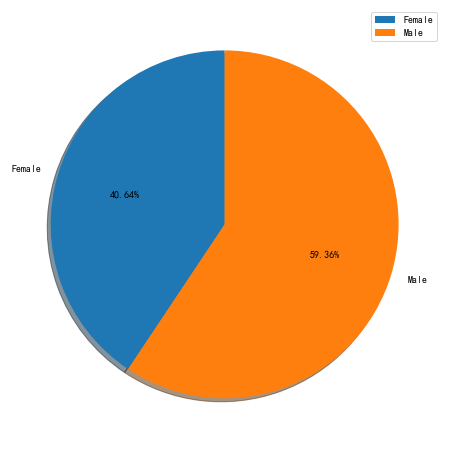

In [7]:
plt.figure(figsize=(10,8))
data_left_Gender =train.groupby('Gender').Attrition.count()
plt.pie(data_left_Gender, labels=data_left_Gender.index, autopct="%1.2f%%", shadow=True,
             startangle=90)
plt.legend()

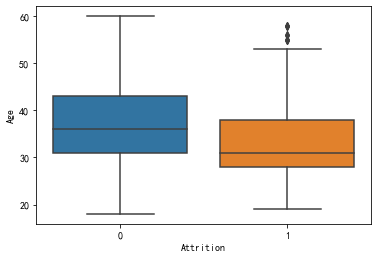

In [8]:
sns.boxplot(train['Attrition'],train['Age'])

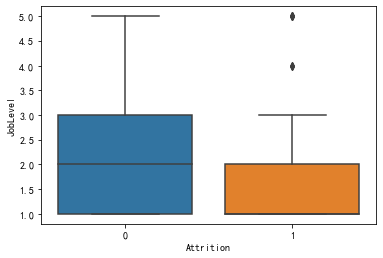

In [9]:
sns.boxplot(train['Attrition'],train['JobLevel'])

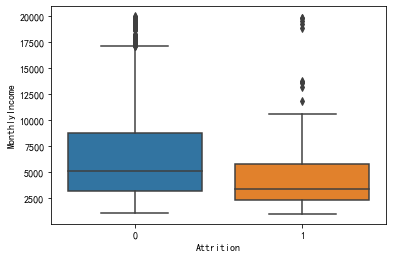

In [10]:
sns.boxplot(train['Attrition'],train['MonthlyIncome'])

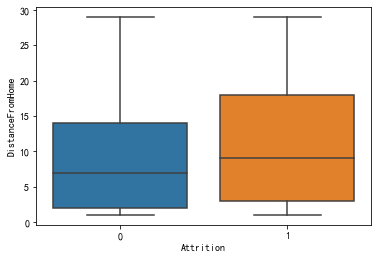

In [11]:
sns.boxplot(train['Attrition'],train['DistanceFromHome'])

<Figure size 1440x1440 with 0 Axes>

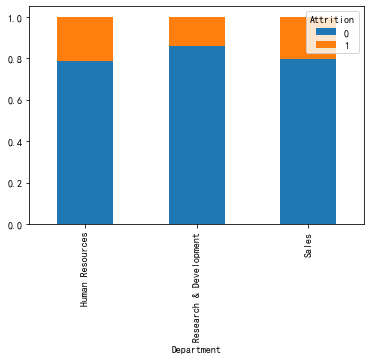

In [12]:
plt.figure(figsize=(20,20))
data_Department=pd.crosstab(train.Department,train.Attrition)
data_Department.div(data_Department.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

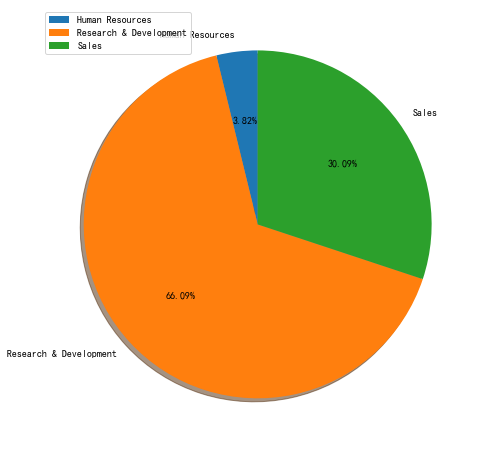

In [13]:
plt.figure(figsize=(10,8))
data_left_Department =train.groupby('Department').Attrition.count()
plt.pie(data_left_Department, labels=data_left_Department.index, autopct="%1.2f%%", shadow=True,
             startangle=90)
plt.legend()

<Figure size 1440x1440 with 0 Axes>

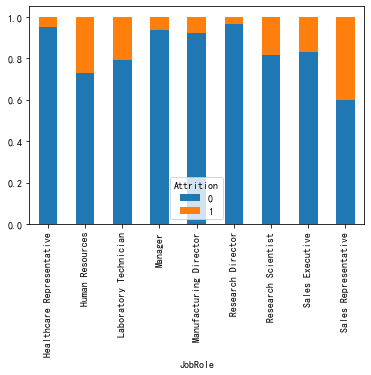

In [14]:
plt.figure(figsize=(20,20))
data_JobRole=pd.crosstab(train.JobRole,train.Attrition)
data_JobRole.div(data_JobRole.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

<Figure size 1440x1440 with 0 Axes>

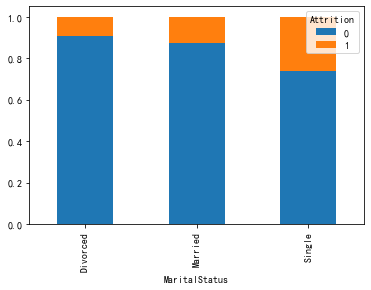

In [15]:
plt.figure(figsize=(20,20))
data_MaritalStatus=pd.crosstab(train.MaritalStatus,train.Attrition)
data_MaritalStatus.div(data_MaritalStatus.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

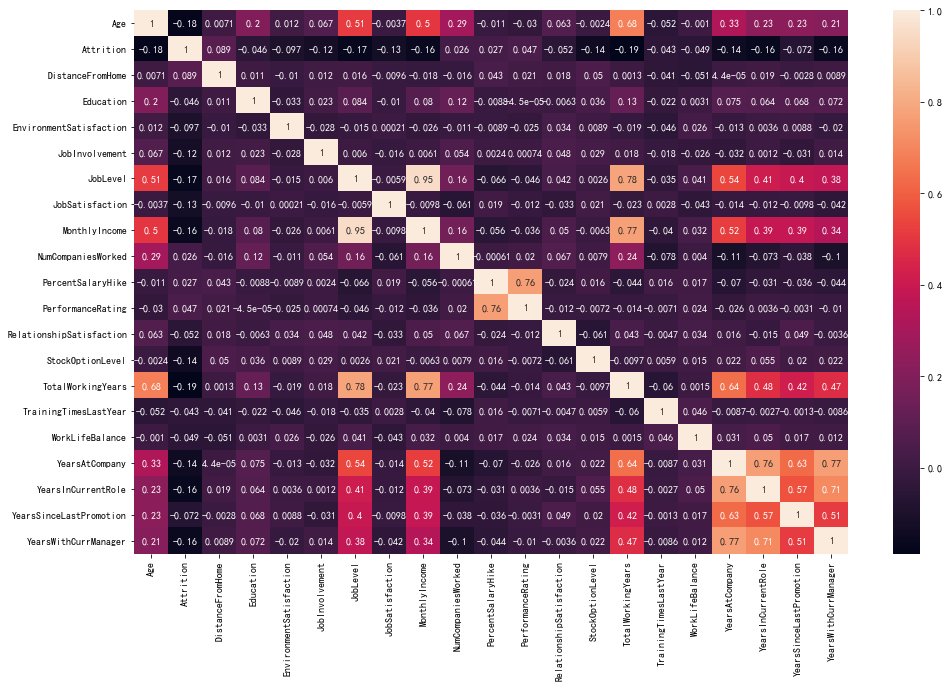

In [16]:
corr = train.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr,annot=True)

In [17]:
train.drop(['JobLevel'],axis=1,inplace=True)
test.drop(['JobLevel'],axis=1,inplace=True)

通过热力图发现部分属性关联性强，所以选择删除

特征处理

In [18]:
#对标称属性进行one-hot编码
train = pd.get_dummies(train)
test= pd.get_dummies(test)

# 将Attrition(该字段为标签)移至最后,方便索引
Attrition = train['Attrition']
train.drop(['Attrition'],axis=1,inplace=True)
train.insert(0,'Attrition',Attrition)

In [19]:
def creat(df):
    df['AgeEducation'] = df['Education']*100/df['Age']
    df['AgeMoneyly'] = df['MonthlyIncome']*df['JobInvolvement']//df['Age']
    df['IntoAge'] = df['Age']-df['TotalWorkingYears']
    df['Satisfaction'] = df['JobSatisfaction']+df['EnvironmentSatisfaction']+df['RelationshipSatisfaction']
creat(train)
creat(test)

In [20]:
train.to_csv('train_solved.csv',index=False)
test.to_csv('test_solved.csv',index=False)
print('保存成功')

保存成功


In [21]:
df_train = pd.read_csv('train_solved.csv')
df_test = pd.read_csv('test_solved.csv')
print(df_train.shape)
print(df_test.shape)
df_test.head()

(1100, 52)
(350, 51)


,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,AgeEducation,AgeMoneyly,IntoAge,Satisfaction
0,40,9,4,3,3,3,3975,3,11,3,3,2,11,2,4,8,7,0,7,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,10.000000,298,29,9
1,53,7,2,4,3,3,18606,3,18,3,2,1,26,6,3,7,7,4,7,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,3.773585,1053,27,9
2,42,2,4,1,2,4,6781,3,23,4,2,0,14,6,3,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,9.523810,322,28,7
3,34,11,3,3,2,2,4490,4,11,3,4,2,14,5,4,10,9,1,8,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,8.823529,264,20,9
4,32,1,1,4,3,1,2956,1,13,3,4,0,1,2,3,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,3.125000,277,31,9


In [22]:
# 标准化
from sklearn.preprocessing import MinMaxScaler
std = MinMaxScaler()
df_train.iloc[:,1:] = std.fit_transform(df_train.iloc[:,1:])
df_test = std.transform(df_test)

In [23]:
X = df_train.iloc[:,1:]
y = df_train["Attrition"]

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
#线性模型
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(penalty='l1',solver='liblinear')
logreg.fit(X_train,y_train)
print('logreg train score:{:.3f}'.format(logreg.score(X_train,y_train)))   
print('logreg test score:{:.3f}'.format(logreg.score(X_test,y_test))) 

logreg train score:0.892
logreg test score:0.891


In [26]:
df_coef = pd.DataFrame(index=X_train.columns,data=np.transpose(logreg.coef_))
df_coef['abs'] = df_coef.iloc[:,0].abs()
df_coef = df_coef.sort_values(by='abs', ascending=False)
print(df_coef.head())

                                          0       abs
OverTime_Yes                       1.960252  1.960252
JobRole_Healthcare Representative -1.814818  1.814818
Age                               -1.718558  1.718558
YearsSinceLastPromotion            1.347243  1.347243
NumCompaniesWorked                 1.243380  1.243380


In [27]:
predL = logreg.predict(df_test)

In [28]:
print("预测准确率为：",1-np.mean(predL))

预测准确率为： 0.9028571428571428


In [29]:
predL

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

员工曾经工作过的公司数
加班
股票期权水平
上一年的培训时长

In [30]:
#随机森林
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=5,random_state=1)
forest.fit(X_train,y_train)
print('forest train score:{:.3f}'.format(forest.score(X_train,y_train)))  
print('forest train score:{:.3f}'.format(forest.score(X_test,y_test)))   

forest train score:0.970
forest train score:0.882


In [32]:
df_feature_importances = pd.DataFrame(index=X_train.columns,data=np.transpose(forest.feature_importances_))
df_feature_importances['abs'] = df_feature_importances.iloc[:,0].abs()
df_feature_importances = df_feature_importances.sort_values(by='abs', ascending=False)
print(df_feature_importances.head())

                          0       abs
Age                0.081939  0.081939
MonthlyIncome      0.073712  0.073712
OverTime_No        0.054447  0.054447
AgeMoneyly         0.053067  0.053067
PercentSalaryHike  0.052843  0.052843


年龄
公司跟家庭住址的距离
在目前工作职责的工作年数
员工月收入
股票期权水平

使用逻辑回归进行预测

In [33]:
predF=forest.predict(df_test)
print("预测准确率为：",1-np.mean(predF))

预测准确率为： 0.9142857142857143


In [34]:
predF

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,

In [35]:
# 数据分割 加网格搜索
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
x_train,x_test,y_train,y_test = train_test_split(
    df_train.iloc[:,1:],df_train['Attrition'],random_state=22)
params={
    'penalty':['l1', 'l2'],
    'C':np.arange(1,4.1,0.2),
}
estimator = LogisticRegression(solver='liblinear')
grid = GridSearchCV(estimator,param_grid=params,cv=10)
grid.fit(x_train,y_train)
print('最好的参数',grid.best_params_)
score = grid.score(x_test,y_test)
print('在测试集的得分',score)

最好的参数 {'C': 2.8, 'penalty': 'l1'}
在测试集的得分 0.8909090909090909


In [36]:
#进行预测
estimator = LogisticRegression(solver='liblinear',C=1.9,penalty='l1')
estimator.fit(df_train.iloc[:,1:],df_train['Attrition'])
pred = estimator.predict(df_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [37]:
print("预测准确率为：",1-np.mean(pred))

预测准确率为： 0.9057142857142857
